Đọc và kiểm tra dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("calories.csv")

# Xem 5 dòng đầu tiên
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [2]:
df.info()   # Kiểm tra kiểu dữ liệu, số lượng giá trị thiếu
print(df.describe()) # Thống kê dữ liệu (trung bình, min, max...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000  

Tiền xử lí dữ liệu

In [3]:
# Mã hóa Gender
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Trường hợp có nhiều null
df = df.dropna() # Loại bỏ dữ liệu bị thiếu

Lựa chọn đặc trưng

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tách đặc trưng và nhãn
X = df.drop(columns=['Calories'])
y = df['Calories']

# Chia dữ liệu: 70% train, 10% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 của 80% = 10%

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42) # Lựa chọn n_estimators, max_depth phù hợp
model.fit(X_train, y_train)

# Dự đoán
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Đánh giá mô hình:")
print(f"Validation - MAE: {mae_val:.2f} | R²: {r2_val:.4f}")
print(f"Test       - MAE: {mae_test:.2f} | R²: {r2_test:.4f}")

# Lấy độ quan trọng của đặc trưng
importances = model.feature_importances_
feature_names = X.columns


Đánh giá mô hình:
Validation - MAE: 2.33 | R²: 0.9966
Test       - MAE: 2.34 | R²: 0.9969


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13044\218627217.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


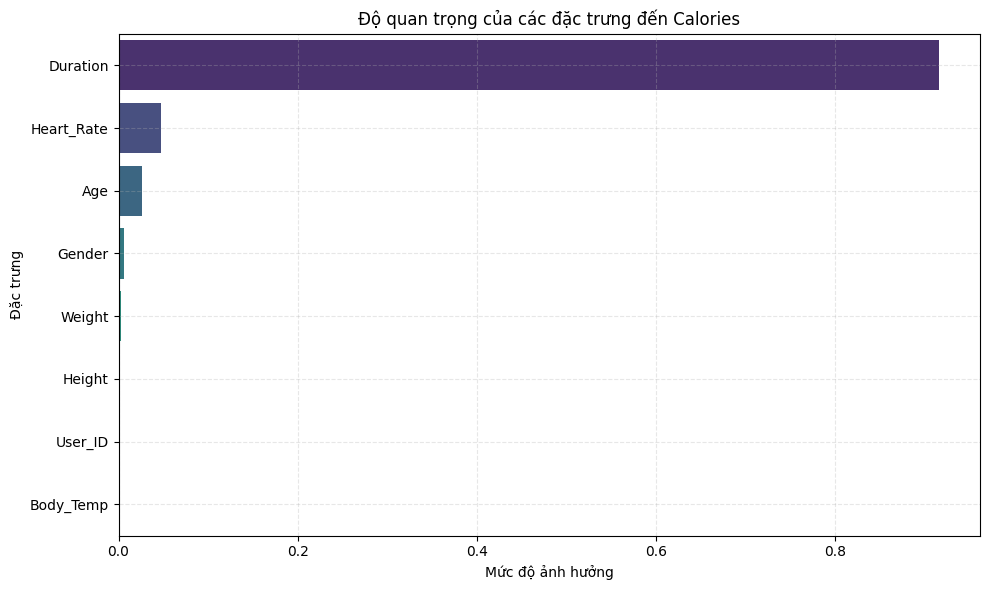

In [7]:
# Tạo DataFrame để dễ vẽ
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Độ quan trọng của các đặc trưng đến Calories')
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Thử loại bỏ các đặc trưng ít quan trọng và thử lại

In [16]:
# Bỏ các đặc trưng không quan trọng
X = df.drop(columns=['Body_Temp', 'User_ID', 'Height','Calories'])
y = df['Calories']

# Chia dữ liệu: 70% train, 10% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 của 80% = 10%

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_val_pred_rf = model.predict(X_val)
y_test_pred_rf = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mae_val = mean_absolute_error(y_val, y_val_pred_rf)
r2_val = r2_score(y_val, y_val_pred_rf)

mae_test = mean_absolute_error(y_test, y_test_pred_rf)
r2_test = r2_score(y_test, y_test_pred_rf)

print("Đánh giá mô hình:")
print(f"Validation - MAE: {mae_val:.2f} | R²: {r2_val:.4f}")
print(f"Test       - MAE: {mae_test:.2f} | R²: {r2_test:.4f}")


Đánh giá mô hình:
Validation - MAE: 2.28 | R²: 0.9968
Test       - MAE: 2.28 | R²: 0.9971


Thử với linear regression

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
# Dự đoán
y_val_pred_lr = model.predict(X_val)
y_test_pred_lr = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mae_val = mean_absolute_error(y_val, y_val_pred_lr)
r2_val = r2_score(y_val, y_val_pred_lr)

mae_test = mean_absolute_error(y_test, y_test_pred_lr)
r2_test = r2_score(y_test, y_test_pred_lr)

print("Đánh giá mô hình:")
print(f"Validation - MAE: {mae_val:.2f} | R²: {r2_val:.4f}")
print(f"Test       - MAE: {mae_test:.2f} | R²: {r2_test:.4f}")

Đánh giá mô hình:
Validation - MAE: 9.47 | R²: 0.9598
Test       - MAE: 9.72 | R²: 0.9589


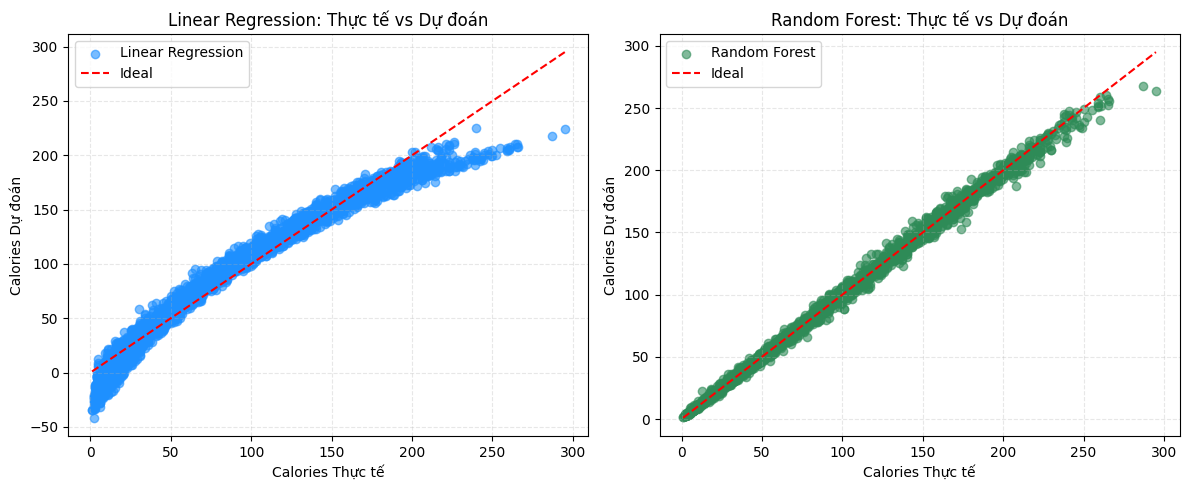

In [20]:
# Biểu đồ 1: Calories thực tế vs dự đoán - Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, color='dodgerblue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Calories Thực tế')
plt.ylabel('Calories Dự đoán')
plt.title('Linear Regression: Thực tế vs Dự đoán')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Biểu đồ 2: Calories thực tế vs dự đoán - Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='seagreen', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Calories Thực tế')
plt.ylabel('Calories Dự đoán')
plt.title('Random Forest: Thực tế vs Dự đoán')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
